In [1]:
from cideMOD import (
    CellParser,
    ErrorCheck,
    NDProblem,
    Problem,
    SolverCrashed,
    Trigger,
    init_results_folder,
    ModelOptions,
)

import os
import numpy as np
import matplotlib.pyplot as plt
import time as tm

Data + Define model using gmsh mesher and the base dolfin mesher

In [2]:
#Define Chen path
overwrite = True
case = "Chen_2020"
data_path = "Data/data_{}".format(case)
params = "params_tuned.json"

C_rate = -1
I_app = -5 #C_rate * problem.Q
t_f = 3600 /abs(C_rate)*1.25
v_min = Trigger(2.5, "v")
#P4D modell
#Vi setter i=5 for å se om vi får noe nyttig
i=6
model_options = ModelOptions(mode='P4D', clean_on_exit=False,N_x=i,N_y=i,N_z=i)
cell = CellParser(params, data_path=data_path)
problem1= Problem(cell, model_options)
problem2= Problem(cell, model_options)
#Set SOC, Text, Tint, problem1
problem1.set_cell_state(1, 273 + 25, 273 + 25)
problem1.setup(mesh_engine='GmshMesher')
#Set SOC, Text, Tint, problem2
problem2.set_cell_state(1, 273 + 25, 273 + 25)
problem2.setup()

Capacidad Anodo: 5.090421993425188
Capacidad Catodo: 5.574712396434605
Capacidad Celda: 5.090421993425188

Building problem setup
 - Build cell parameters - Done 
 - Initializing state - Done 
 - Build variational formulation - Done 
Problem Setup finished.
Problem has 32968.0 dofs.



We run the solver for our Gmsh mesh

In [3]:
#min_step=36 implies 100 steps pr  simulation (1 hour)
status = problem2.solve_ie(
    min_step=36, i_app=I_app, t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min]
)

['a', 's', 'c']


Solving the problem with the DolfinMesh

In [4]:
#min_step=36 implies 100 steps pr  simulation (1 hour)
status = problem2.solve_ie(
    min_step=36, i_app=I_app, t_f=t_f, store_delay=10, adaptive=True, triggers=[v_min]
)

Solving ...
initializing solution
Voltage: 0.4294	Current: 0.00e+00	Time: *** Warning: PETSc SNES solver diverged in 4 iterations with divergence reason DIVERGED_LINE_SEARCH.


What do we get=

In [5]:
print(problem1.WH.global_vars.keys())
print(problem2.WH.global_vars.keys())

dict_keys(['voltage', 'current', 'capacity'])


But what do these keys contain?

In [6]:
print(problem1.WH.global_var_arrays)
print(problem2.WH.global_var_arrays)

[[0.0], [0.4293755769407422], [0.0], [0.0]]


Gmsh mesh does not seem to be working
We plot the results from problem 2

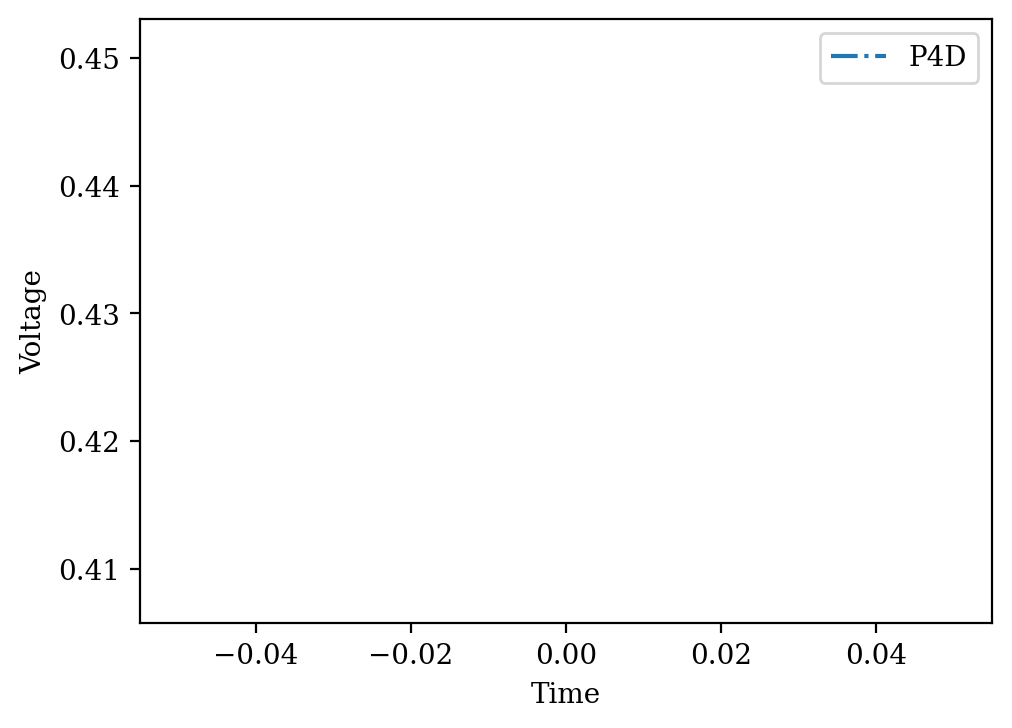

In [7]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax1.plot(problem2.WH.global_var_arrays[0], problem2.WH.global_var_arrays[1], "-.")
ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage")
ax1.legend(["P4D"], loc="best")

Plot current vs tid

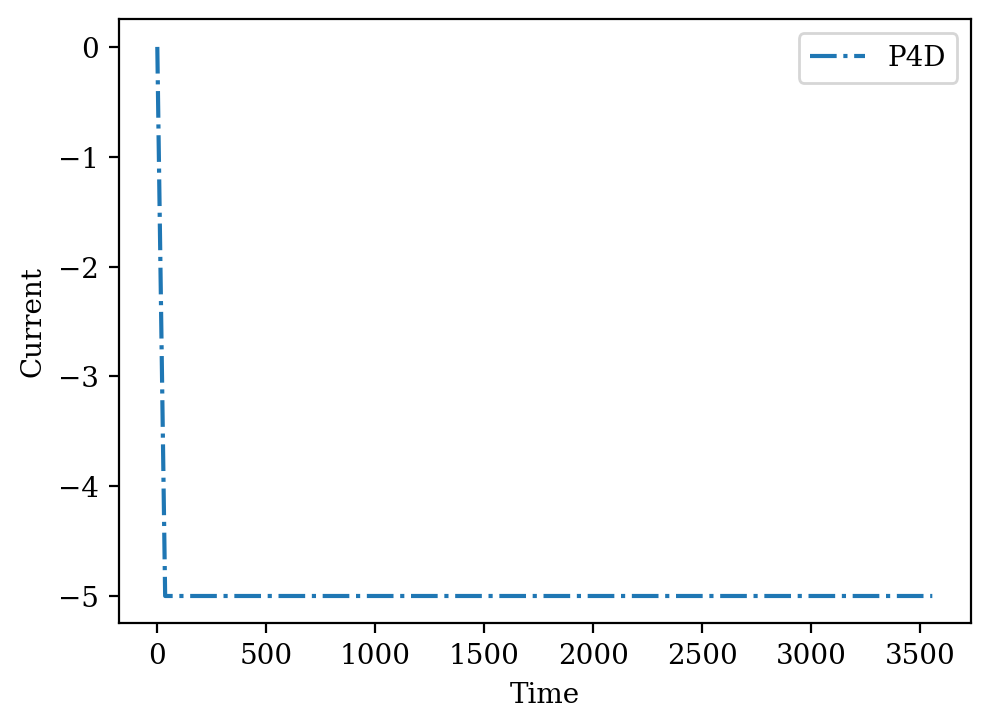

In [17]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax2 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax2.plot(problem2.WH.global_var_arrays[0], problem2.WH.global_var_arrays[2], "-.")
ax2.set_xlabel("Time")
ax2.set_ylabel("Current")
ax2.legend(["P4D"], loc="best")

Time vs capacity

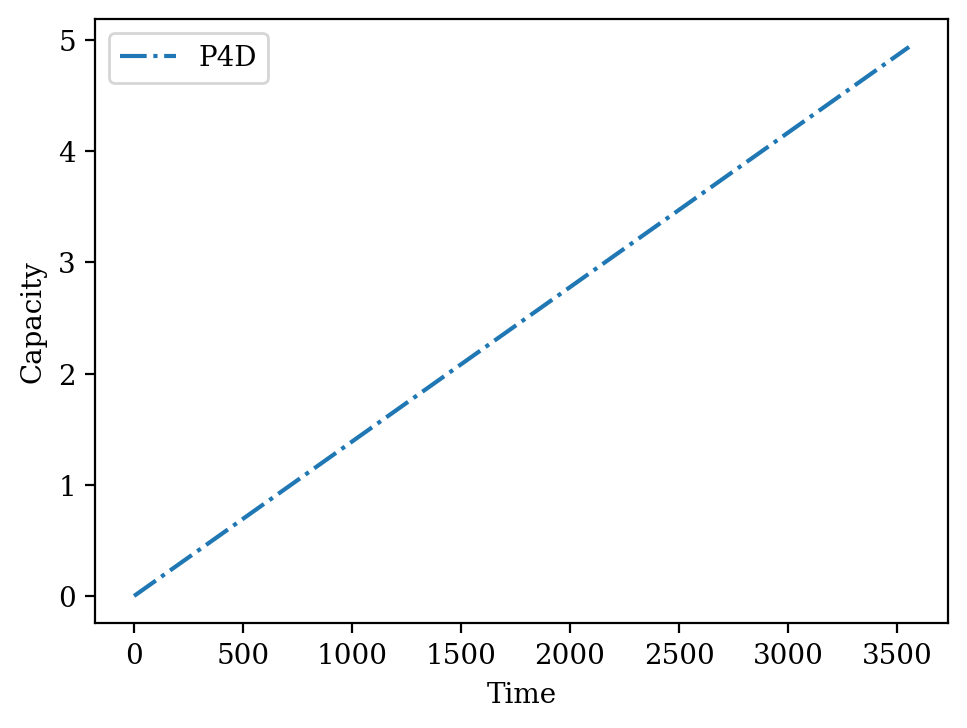

In [18]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig, ax2 = plt.subplots(1, 1, figsize=(5.5, 4), dpi=200)
# plot voltage vs tid
ax2.plot(problem2.WH.global_var_arrays[0], problem2.WH.global_var_arrays[3], "-.")
ax2.set_xlabel("Time")
ax2.set_ylabel("Capacity")
ax2.legend(["P4D"], loc="best")

In [20]:
type(problem.mesh)

method